In [56]:
from IPython.display import Markdown, display
abstract_text = """**Abstract:**

Este estudio se basa en un conjunto de datos que proporciona información detallada sobre la detección de incendios forestales en la región de turquía, utilizando satélites que emplean instrumentos VIIRS(Sistemas de imágenes e información de radiación visible e infrarroja, por sus siglas en inlgés). Los datos incluyen la latitud y longitud de los incendios, la temperatura de brillo de los píxeles que representan el fuego, la fecha y hora de adquisición, el satélite utilizado, la confianza en la detección, la potencia radiativa de los incendios y el tipo de incendio, entre otros.

A partir de estos datos, se formulan diversas preguntas e hipótesis relacionadas con la distribución geográfica de los incendios y la influencia de factores temporales en la detección, la relación entre la temperatura de brillo y la potencia radiativa de los incendios, y la prevalencia de diferentes tipos de incendios en diversas regiones geográficas.

El análisis de estos datos puede proporcionar información valiosa para comprender mejor la dinámica de los incendios forestales e identificar patrones estacionales y geográficos. Los resultados de este estudio tienen el potencial de contribuir a la gestión y prevención de incendios forestales, así como a la comprensión de su impacto en el medio ambiente y la sociedad.

A continuación se plantean algunas hipótesis y preguntas en función del dataset bajo estudio:

**1-** ¿Existe una correlación entre la latitud y la frecuencia de incendios forestales?

**2-** ¿Las regiones cercanas al ecuador (bajas latitudes) experimentan más incendios forestales que las regiones cercanas a los polos (altas latitudes)?

**3-** ¿Cuál es la relación entre la hora de adquisición (Acq_Time) y la confianza (Confidence) de la detección de incendios?

**4-** ¿La cantidad de incendios es constante estacionalmente, o se tienen ciertas difernecias en función de la estaciones del año?


A continuación se muestran los primeros valores del dataset elegido para estar más contextualizados con los datos:

"""

display(Markdown(abstract_text))

**Abstract:**

Este estudio se basa en un conjunto de datos que proporciona información detallada sobre la detección de incendios forestales en la región de turquía, utilizando satélites que emplean instrumentos VIIRS(Sistemas de imágenes e información de radiación visible e infrarroja, por sus siglas en inlgés). Los datos incluyen la latitud y longitud de los incendios, la temperatura de brillo de los píxeles que representan el fuego, la fecha y hora de adquisición, el satélite utilizado, la confianza en la detección, la potencia radiativa de los incendios y el tipo de incendio, entre otros.

A partir de estos datos, se formulan diversas preguntas e hipótesis relacionadas con la distribución geográfica de los incendios y la influencia de factores temporales en la detección, la relación entre la temperatura de brillo y la potencia radiativa de los incendios, y la prevalencia de diferentes tipos de incendios en diversas regiones geográficas.

El análisis de estos datos puede proporcionar información valiosa para comprender mejor la dinámica de los incendios forestales e identificar patrones estacionales y geográficos. Los resultados de este estudio tienen el potencial de contribuir a la gestión y prevención de incendios forestales, así como a la comprensión de su impacto en el medio ambiente y la sociedad.

A continuación se plantean algunas hipótesis y preguntas en función del dataset bajo estudio:

**1-** ¿Existe una correlación entre la latitud y la frecuencia de incendios forestales?

**2-** ¿Las regiones cercanas al ecuador (bajas latitudes) experimentan más incendios forestales que las regiones cercanas a los polos (altas latitudes)?

**3-** ¿Cuál es la relación entre la hora de adquisición (Acq_Time) y la confianza (Confidence) de la detección de incendios?

**4-** ¿La cantidad de incendios es constante estacionalmente, o se tienen ciertas difernecias en función de la estaciones del año?


A continuación se muestran los primeros valores del dataset elegido para estar más contextualizados con los datos:



In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#A continuación se crea la variable que guardará la dirección del dataset. 
#La misma se encuentra almacenada en Github

url_Global_fire = 'https://raw.githubusercontent.com/francolange00/CoderHouse_Data_Science/main/Leo_Satellite_Global%20_Fire-Dataset.csv'

#Se crea el dataframe para el dataset:
df_Global_fire = pd.read_csv(url_Global_fire, index_col=0).reset_index()

df_Global_fire.head(10)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,37.7296,34.8998,303.3,1.9,1.3,2021-01-01,903,Terra,MODIS,56,6.03,279.3,20.1,D,0
1,37.7343,34.8774,306.7,1.9,1.3,2021-01-01,903,Terra,MODIS,64,6.03,276.7,24.9,D,0
2,37.8685,29.0728,300.5,1.0,1.0,2021-01-01,903,Terra,MODIS,38,6.03,286.0,5.0,D,0
3,37.7362,34.8945,310.3,1.9,1.3,2021-01-01,903,Terra,MODIS,70,6.03,278.8,28.8,D,0
4,37.1456,40.4709,308.9,1.2,1.1,2021-01-01,1041,Aqua,MODIS,54,6.03,291.1,9.0,D,0
5,37.1231,42.4012,309.4,1.5,1.2,2021-01-01,1041,Aqua,MODIS,68,6.03,294.9,13.7,D,0
6,36.9835,40.1958,324.6,1.2,1.1,2021-01-01,1041,Aqua,MODIS,83,6.03,291.7,27.3,D,0
7,37.0970,40.6650,309.8,1.2,1.1,2021-01-01,1041,Aqua,MODIS,69,6.03,293.9,9.3,D,0
8,37.1549,40.2119,322.2,1.2,1.1,2021-01-01,1041,Aqua,MODIS,82,6.03,293.3,22.2,D,0
9,37.0423,40.5362,306.9,1.2,1.1,2021-01-01,1041,Aqua,MODIS,61,6.03,290.9,7.7,D,0


In [57]:
Pregunta_1 = """Respondiendo a la primer pregunta planteada al inicio: ***¿Existe una correlación entre la latitud y la frecuencia de incendios forestales?***

Para esto, lo que se planeta es un gráfico de tipo "boxplot" en el que se verá de forma clara cual es la distribución de los incendios en función de su latitud de ocurrencia
"""

display(Markdown(Pregunta_1))

Respondiendo a la primer pregunta planteada al inicio: ***¿Existe una correlación entre la latitud y la frecuencia de incendios forestales?***

Para esto, lo que se planeta es un gráfico de tipo "boxplot" en el que se verá de forma clara cual es la distribución de los incendios en función de su latitud de ocurrencia


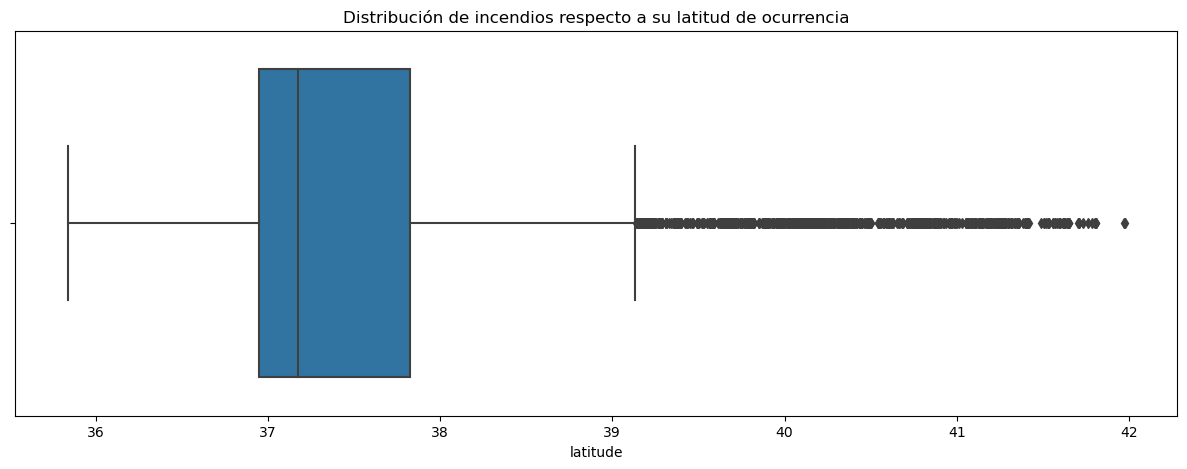

In [40]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df_Global_fire['latitude'])
plt.title('Distribución de incendios respecto a su latitud de ocurrencia')
plt.show()

In [33]:
Respuesta_1 = """Se puede observar que contamos con muchos valores "outliers" pero que la mayor cantidad de incendios los podemos encontrar entre la latitud 37 y 38 aproximadamente."""

display(Markdown(Respuesta_1))

Se puede observar que contamos con muchos valores "outliers" pero que la mayor cantidad de incendios los podemos encontrar entre la latitud 37 y 38 aproximadamente.

In [39]:
Pregunta_2 = """Respondiendo a la segunda pregunta planteada: ***¿Las regiones cercanas al ecuador (bajas latitudes) experimentan más incendios forestales que las regiones cercanas a los polos (altas latitudes)?***

En este caso basta con obtener el valor exacto de la mediana y observar la figura enterior para darnos cuenta que efectivamente mientras más nos acercamos al ecuador es más probable que tengamos mayor número de incendios
"""

display(Markdown(Pregunta_2))

Respondiendo a la segunda pregunta planteada: ***¿Las regiones cercanas al ecuador (bajas latitudes) experimentan más incendios forestales que las regiones cercanas a los polos (altas latitudes)?***

En este caso basta con obtener el valor exacto de la mediana y observar la figura enterior para darnos cuenta que efectivamente mientras más nos acercamos al ecuador es más probable que tengamos mayor número de incendios


In [36]:
mediana_latitud = round(df_Global_fire['latitude'].median(),2)

print("La mediana de la latitud de los incendios se encuentra en: ", mediana_latitud)

La mediana de la latitud de los incendios se encuentra en:  37.17


In [47]:
Pregunta_3 = """Respondiendo a la tercer pregunta planteada: ***¿Cuál es la relación entre la hora de adquisición (Acq_Time) y la confianza (Confidence) de la detección de incendios?***

Para responder a esta pregunta lo que se hizo es diferenciar entre los datos obtenidos de día con los recolectados de noche. Para esto se volvió a utilizar un gráfico de boxplot en donde se compara el nivel de confianza de los datos obtenidos dependendiendo si se contaba o no con la luz del sol. El nivel de confianza se encuentra entre 0-100, donde un "0" representa un dato totalmente irrelevante y un "100" un dato irrefutable. 
"""

display(Markdown(Pregunta_3))

Respondiendo a la tercer pregunta planteada: ***¿Cuál es la relación entre la hora de adquisición (Acq_Time) y la confianza (Confidence) de la detección de incendios?***

Para responder a esta pregunta lo que se hizo es diferenciar entre los datos obtenidos de día con los recolectados de noche. Para esto se volvió a utilizar un gráfico de boxplot en donde se compara el nivel de confianza de los datos obtenidos dependendiendo si se contaba o no con la luz del sol. El nivel de confianza se encuentra entre 0-100, donde un "0" representa un dato totalmente irrelevante y un "100" un dato irrefutable 


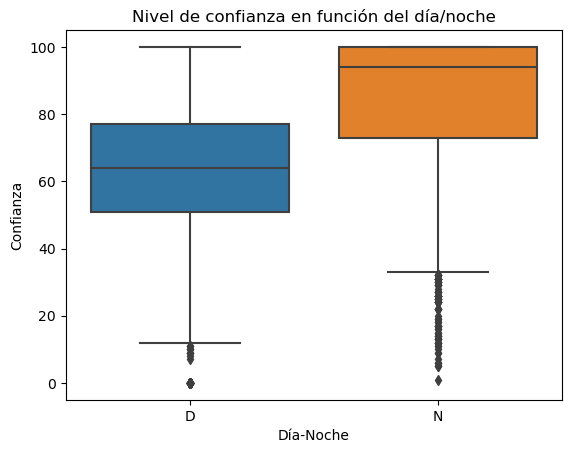

In [46]:
sns.boxplot(x='daynight', y='confidence', data=df_Global_fire)

# Personaliza el título
plt.title('Nivel de confianza en función del día/noche')
plt.xlabel('Día-Noche')
plt.ylabel('Confianza')
# Muestra el gráfico
plt.show()

In [48]:
Respuesta_3 = """Como puede observarse, los datos obtenidos de noche son mucho más confiables de los obtenidos de día. Esto debido a la naturaleza del funcionamiento de los intrumentos utilizados en el satélite para la recolección de los datos. La luz del sol puede influenciar negativamente en los resultados obtenidos haciendo parecer ciertos focos de incendios más intensos y grandes de lo que realmente son. """

display(Markdown(Respuesta_3))

Como puede observarse, los datos obtenidos de noche son mucho más confiables de los obtenidos de día. Esto debido a la naturaleza del funcionamiento de los intrumentos utilizados en el satélite para la recolección de los datos. La luz del sol puede influenciar negativamente en los resultados obtenidos haciendo parecer ciertos focos de incendios más intensos y grandes de lo que realmente son. 

In [53]:
Pregunta_4 = """Respondiendo a la última pregunta planteada al inicio: ***¿La cantidad de incendios es constante estacionalmente, o se tienen ciertas difernecias en función de la estaciones del año?***

En este caso podemos reutilizar una gráfica obtenida en la entrega anterior en donde se muestra la sumatoria de incendios mes a mes a lo largo de todo un año:
"""

display(Markdown(Pregunta_4))

Respondiendo a la última pregunta planteada al inicio: ***¿La cantidad de incendios es constante estacionalmente, o se tienen ciertas difernecias en función de la estaciones del año?***

En este caso podemos reutilizar una gráfica obtenida en la entrega anterior en donde se muestra la sumatoria de incendios mes a mes a lo largo de todo un año:


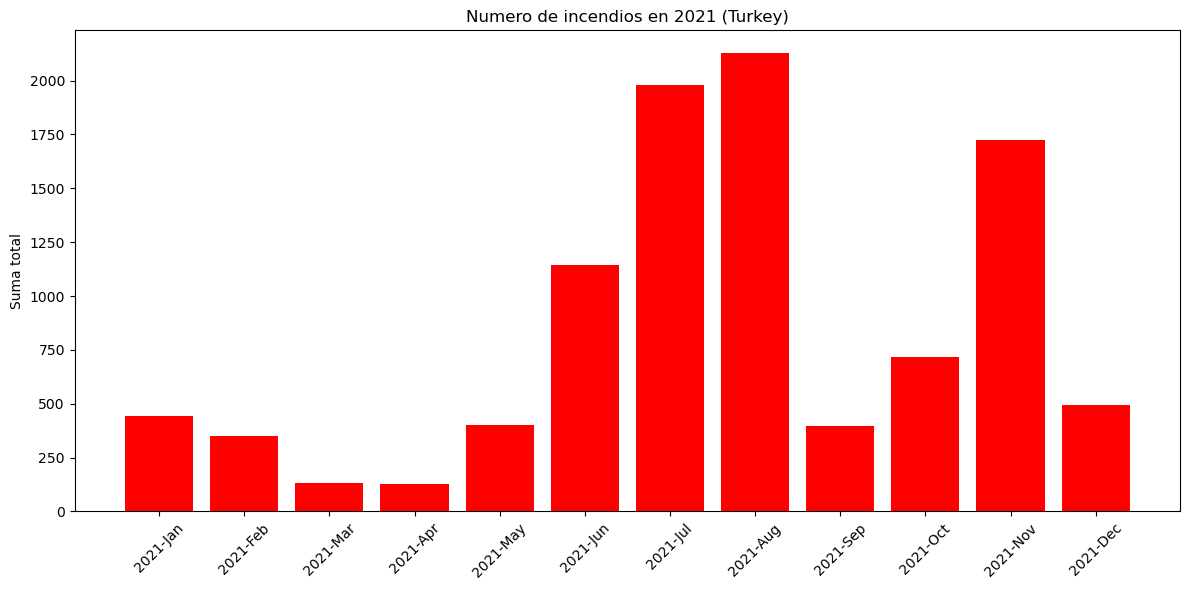

In [54]:
import calendar

df_Global_fire['acq_date'] = pd.to_datetime(df_Global_fire['acq_date'])

df_Global_fire['month'] = df_Global_fire['acq_date'].dt.month
df_Global_fire['year'] = df_Global_fire['acq_date'].dt.year

#Se agrupa y cuentan los incendios por año y mes
Fires_sum = df_Global_fire.groupby(['year', 'month']).size().reset_index(name='count')

#Se mapea los números de mes a nombres de mes
Fires_sum['month'] = Fires_sum['month'].apply(lambda x: calendar.month_abbr[x])

#Se Crea una gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(Fires_sum['year'].astype(str) + '-' + Fires_sum['month'], Fires_sum['count'], color='r')
plt.ylabel('Suma total')
plt.title('Numero de incendios en 2021 (Turkey)')
plt.xticks(rotation=45)

# Se muestra la gráfica
plt.tight_layout()
plt.show()

In [55]:
Respuesta_4 = """Como era de esperarse, tenemos un gran incremento en el número de incedios en la estación de verano principalmente. Por lo que se responde a la pregunta de que dichos incendios no son constantes a lo largo del año y por lo tanto a hay que poner foco entre los meses de junio y agosto que es en donde más casos de incendios se registran. """

display(Markdown(Respuesta_4))

Como era de esperarse, tenemos un gran incremento en el número de incedios en la estación de verano principalmente. Por lo que se responde a la pregunta de que dichos incendios no son constantes a lo largo del año y por lo tanto a hay que poner foco entre los meses de junio y agosto que es en donde más casos de incendios se registran 